In [ ]:
# !pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
from google.colab import drive
#mount you GoogleDrive to "drive" folder
drive.mount('/drive', force_remount=False)

path = "/drive/MyDrive/IS/ga_dataset/"

Mounted at /drive


In [2]:
import pandas as pd
# Parse dates and set date column to index
data = pd.read_csv(path + "dataset_with_feature.csv",
                  parse_dates=["date"],
                 index_col=["date"]) # parse the date column (tell pandas column 1 is a datetime)

# change [avg_session_duration] to second
# df['avg_session_duration'] = pd.to_timedelta(df['avg_session_duration']).dt.total_seconds()

data.tail()

,sessions,avg_session_duration,week_no,is_weekend
date,,,,
2023-05-02,3202,185.98,18,0
2023-05-03,2808,176.39,18,0
2023-05-04,2842,194.42,18,0
2023-05-05,2598,160.21,18,0
2023-05-06,1981,134.34,18,1


In [3]:
data.dtypes

sessions                  int64
avg_session_duration    float64
week_no                   int64
is_weekend                int64
dtype: object

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2683 entries, 2016-01-01 to 2023-05-06
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sessions              2683 non-null   int64  
 1   avg_session_duration  2683 non-null   float64
 2   week_no               2683 non-null   int64  
 3   is_weekend            2683 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 104.8 KB


# 1

In [ ]:
# Set train-test split ratio
train_ratio = 0.8

# Calculate the index to split the data into train and test sets
split_index = int(len(data) * train_ratio)

# Split the data into train and test sets
train = data[:split_index]
test = data[split_index:]

print(train.shape)
print(test.shape)

(2146, 5)
(537, 5)


In [ ]:
# Check the start and end time of the training and testing dataset
print('The start time of the training dataset is ', train['ds'].min())
print('The end time of the training dataset is ', train['ds'].max())
print('The start time of the testing dataset is ', test['ds'].min())
print('The end time of the testing dataset is ', test['ds'].max())

The start time of the training dataset is  2016-01-01 00:00:00
The end time of the training dataset is  2021-11-15 00:00:00
The start time of the testing dataset is  2021-11-16 00:00:00
The end time of the testing dataset is  2023-05-06 00:00:00


## Baseline Model

In [ ]:
# Use the default hyperparameters to initiate the Prophet model
model_baseline = Prophet()
# Fit the model on the training dataset
model_baseline.fit(data)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9f12qfvd/85zviibg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9f12qfvd/djthrbbe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48464', 'data', 'file=/tmp/tmp9f12qfvd/85zviibg.json', 'init=/tmp/tmp9f12qfvd/djthrbbe.json', 'output', 'file=/tmp/tmp9f12qfvd/prophet_model0v3v00io/prophet_model-20230617114148.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:41:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:41:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


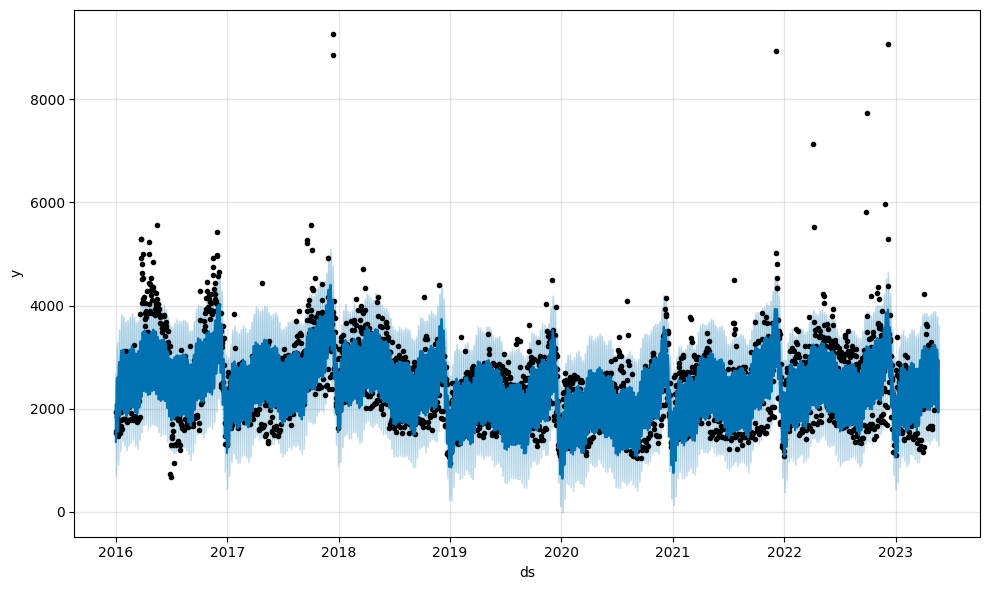

In [ ]:
# Create the time range for the forecast
future_baseline = model_baseline.make_future_dataframe(periods=16)
# Make prediction
forecast_baseline = model_baseline.predict(future_baseline)
# Visualize the forecast
model_baseline.plot(forecast_baseline); # Add semi-colon to remove the duplicated chart

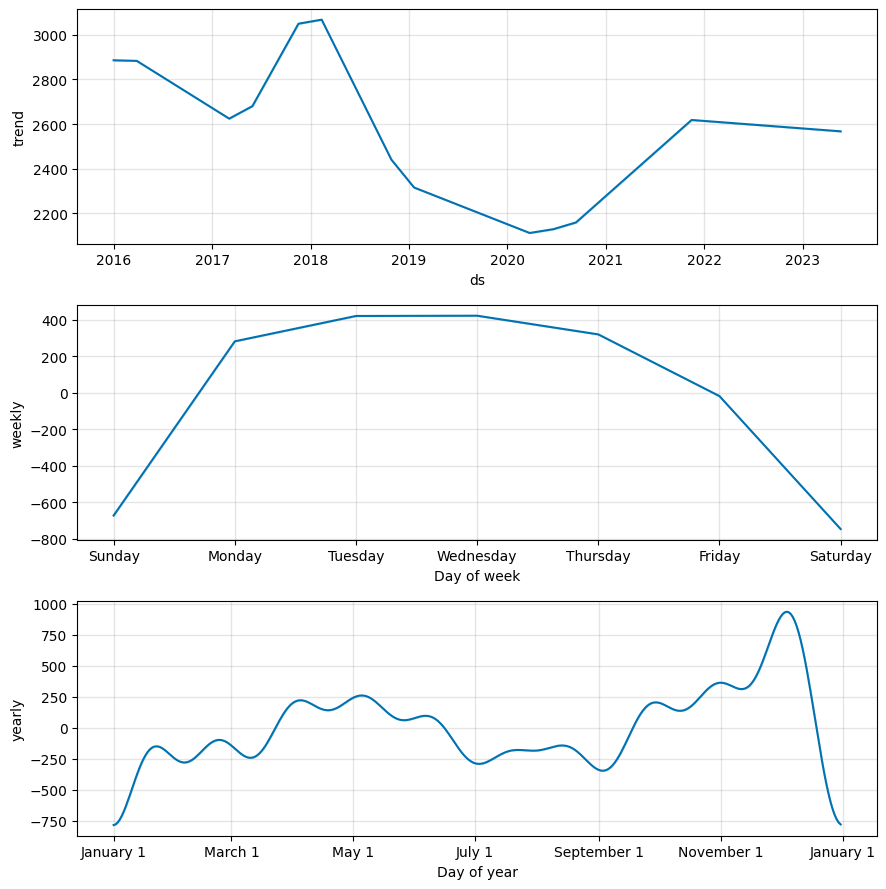

In [ ]:
# Visualize the forecast components
model_baseline.plot_components(forecast_baseline);

In [ ]:
# Prophet model for time series forecast
from prophet import Prophet
# Data processing
import numpy as np
import pandas as pd
# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
# Model performance evaluation
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [ ]:
# Merge actual and predicted values
performance_baseline = pd.merge(test, forecast_baseline[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-16:], on='ds')
# Check MAE value
performance_baseline_MAE = mean_absolute_error(performance_baseline['y'], performance_baseline['yhat'])
print(f'The MAE for the baseline model is {performance_baseline_MAE}')
# Check MAPE value
performance_baseline_MAPE = mean_absolute_percentage_error(performance_baseline['y'], performance_baseline['yhat'])
print(f'The MAPE for the baseline model is {performance_baseline_MAPE}')

ValueError: ignored

## Add Seasonality To Baseline Model

In [ ]:
# Add seasonality
model_season = Prophet(yearly_seasonality=True, weekly_seasonality=True)
# Fit the model on the training dataset
model_season.fit(train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9f12qfvd/fspk3ibk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9f12qfvd/envdvjqt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43626', 'data', 'file=/tmp/tmp9f12qfvd/fspk3ibk.json', 'init=/tmp/tmp9f12qfvd/envdvjqt.json', 'output', 'file=/tmp/tmp9f12qfvd/prophet_modelyqfw55mc/prophet_model-20230617112023.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:20:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:20:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


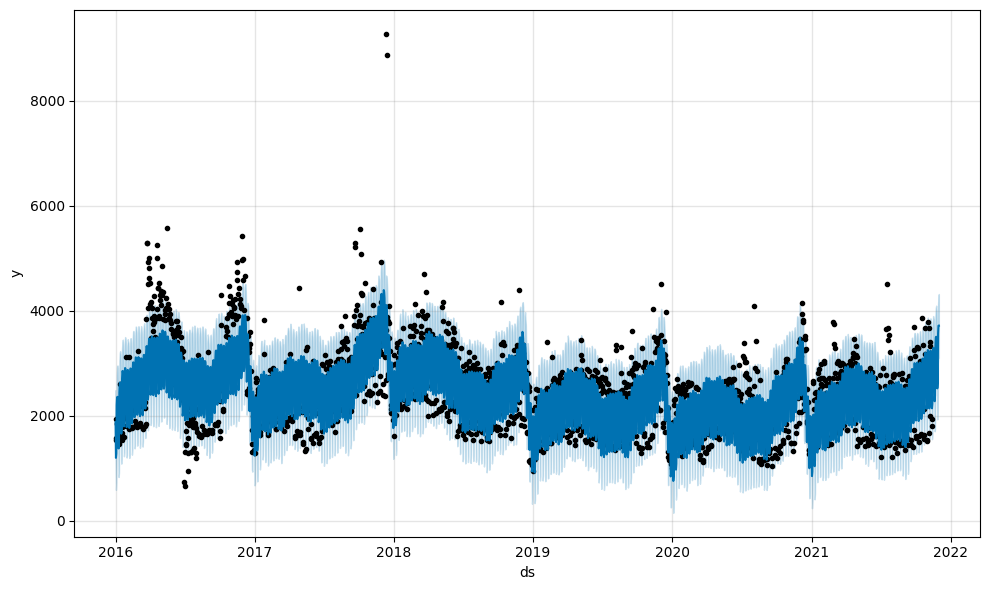

In [ ]:
# Create the time range for the forecast
future_season = model_season.make_future_dataframe(periods=16)
# Make prediction
forecast_season = model_season.predict(future_season)
# Visualize the forecast
model_season.plot(forecast_season); # Add semi-colon to remove the duplicated chart

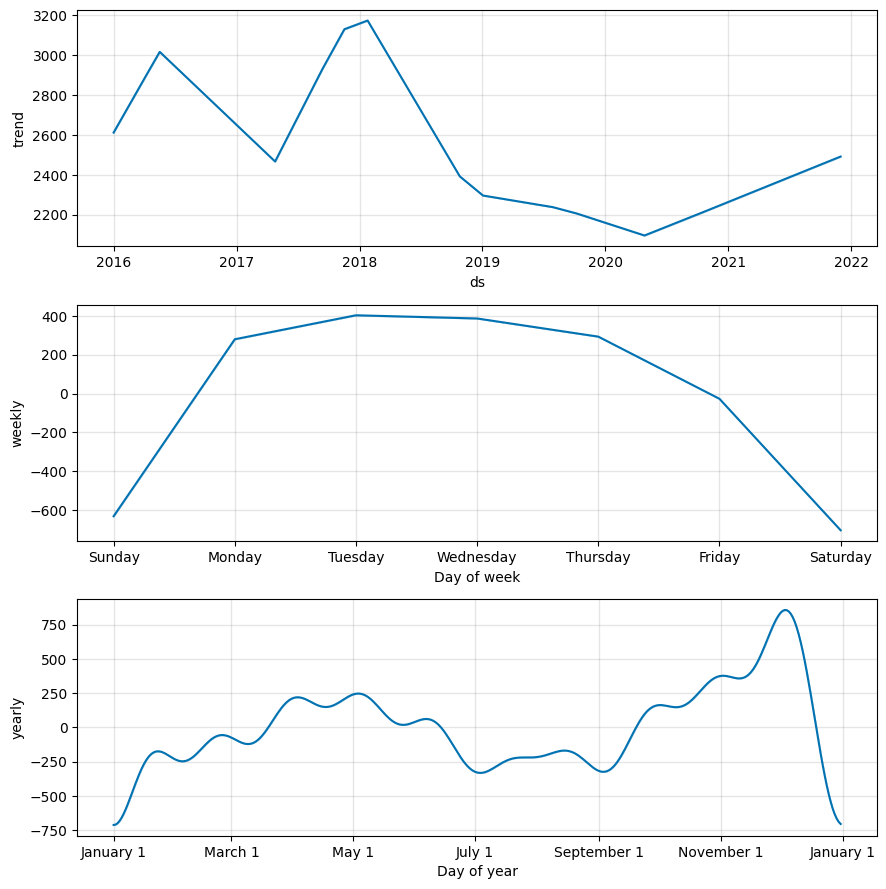

In [ ]:
# Visualize the forecast components
model_season.plot_components(forecast_season);

In [ ]:
# Merge actual and predicted values
performance_season = pd.merge(test, forecast_season[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-16:], on='ds')
# Check MAE value
performance_season_MAE = mean_absolute_error(performance_season['y'], performance_season['yhat'])
print(f'The MAE for the seasonality model is {performance_season_MAE}')
# Check MAPE value
performance_season_MAPE = mean_absolute_percentage_error(performance_season['y'], performance_season['yhat'])
print(f'The MAPE for the seasonality model is {performance_season_MAPE}')

The MAE for the seasonality model is 355.05142533121716
The MAPE for the seasonality model is 0.14218093973620313


##Multivariate Model

In [ ]:
# Add seasonality
model_multivariate = Prophet(yearly_seasonality=True, weekly_seasonality=True)
# Add regressor
model_multivariate.add_regressor('avg_session_duration', standardize=False)
model_multivariate.add_regressor('week_no', standardize=False)
model_multivariate.add_regressor('is_weekend', standardize=False)

# Fit the model on the training dataset
model_multivariate.fit(train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9f12qfvd/bvtfxjsg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9f12qfvd/vl8pftmm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37789', 'data', 'file=/tmp/tmp9f12qfvd/bvtfxjsg.json', 'init=/tmp/tmp9f12qfvd/vl8pftmm.json', 'output', 'file=/tmp/tmp9f12qfvd/prophet_modelnx8vd81n/prophet_model-20230617112212.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:22:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:22:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Create the time range for the forecast
future_multivariate = model_multivariate.make_future_dataframe(periods=16)
# Append the regressor values
future_multivariate = pd.merge(future_multivariate, data[['ds', 'avg_session_duration']], on='ds', how='inner')
future_multivariate = pd.merge(future_multivariate, data[['ds', 'week_no']], on='ds', how='inner')
future_multivariate = pd.merge(future_multivariate, data[['ds', 'is_weekend']], on='ds', how='inner')
# Fill the missing values with the previous value
future_multivariate = future_multivariate.fillna(method='ffill')
# Check the data
future_multivariate.tail(10)

,ds,avg_session_duration,week_no,is_weekend
2152,2021-11-22,204.25,48,0
2153,2021-11-23,243.79,48,0
2154,2021-11-24,214.89,48,0
2155,2021-11-25,186.61,48,0
2156,2021-11-26,178.17,48,0
2157,2021-11-27,151.83,48,1
2158,2021-11-28,170.04,49,1
2159,2021-11-29,227.39,49,0
2160,2021-11-30,222.06,49,0
2161,2021-12-01,218.72,49,0


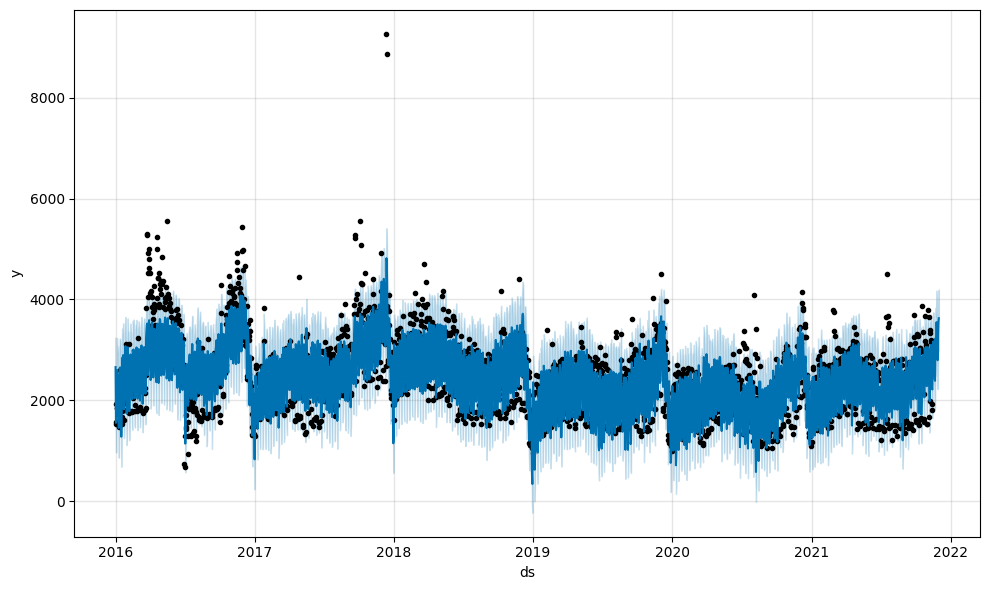

In [ ]:
# Make prediction
forecast_multivariate = model_multivariate.predict(future_multivariate)
# Visualize the forecast
model_multivariate.plot(forecast_multivariate); # Add semi-colon to remove the duplicated chart

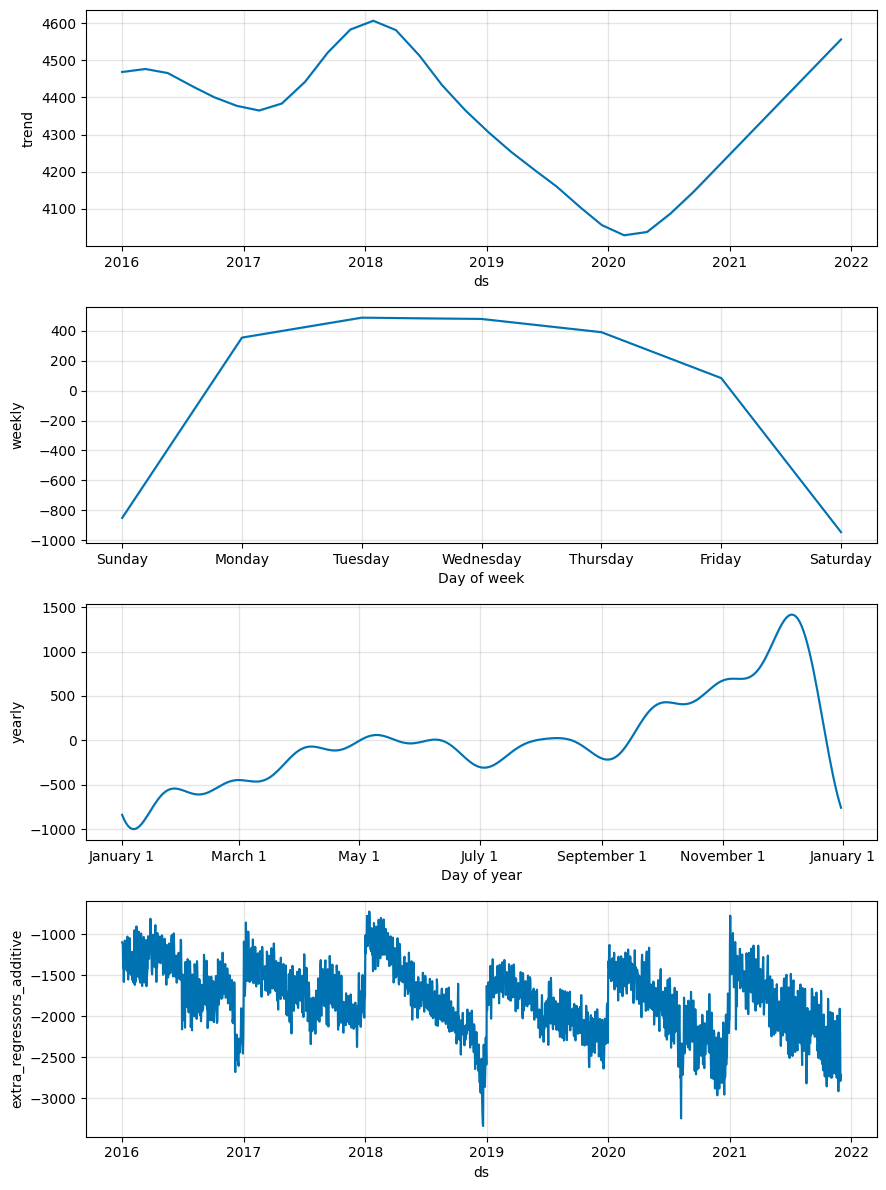

In [ ]:
# Visualize the forecast components
model_multivariate.plot_components(forecast_multivariate);

In [ ]:
# Merge actual and predicted values
performance_multivariate = pd.merge(test, forecast_multivariate[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-16:], on='ds')
# Check MAE value
performance_multivariate_MAE = mean_absolute_error(performance_multivariate['y'], performance_multivariate['yhat'])
print(f'The MAE for the multivariate model is {performance_multivariate_MAE}')
# Check MAPE value
performance_multivariate_MAPE = mean_absolute_percentage_error(performance_multivariate['y'], performance_multivariate['yhat'])
print(f'The MAPE for the multivariate model is {performance_multivariate_MAPE}')

The MAE for the multivariate model is 414.9701317594817
The MAPE for the multivariate model is 0.169543485830524


## Model With Holiday Effect And Event Effect

In [ ]:
# COVID time window
COVID = pd.DataFrame({
    'holiday': 'COVID',
    'ds': pd.to_datetime(['2020-03-15']),
    'lower_window': -15,
    'upper_window': 15,
})
# Super Bowl time window
superbowl = pd.DataFrame({
    'holiday': 'superbowl',
    'ds': pd.to_datetime(['2020-02-02', '2021-02-07']),
    'lower_window': -7,
    'upper_window': 1,
})
# Combine all events
events = pd.concat((COVID, superbowl))
# Take a look at the events data
events

,holiday,ds,lower_window,upper_window
0,COVID,2020-03-15,-15,15
0,superbowl,2020-02-02,-7,1
1,superbowl,2021-02-07,-7,1


In [ ]:
# Add holidays
model_holiday = Prophet(yearly_seasonality=True, weekly_seasonality=True, holidays=events)
# Add built-in country-specific holidays
model_holiday.add_country_holidays(country_name='US')
# Add regressor
model_holiday.add_regressor('avg_session_duration', standardize=False)
model_holiday.add_regressor('week_no', standardize=False)
model_holiday.add_regressor('is_weekend', standardize=False)
# Fit the model on the training dataset
model_holiday.fit(train)
# All the holidays and events
model_holiday.train_holiday_names

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9f12qfvd/e_tk2_9w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9f12qfvd/j8aasfa1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89246', 'data', 'file=/tmp/tmp9f12qfvd/e_tk2_9w.json', 'init=/tmp/tmp9f12qfvd/j8aasfa1.json', 'output', 'file=/tmp/tmp9f12qfvd/prophet_modelrn9d5d0q/prophet_model-20230617113226.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:32:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:32:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


0                                               COVID
1                                           superbowl
2                                      New Year's Day
3                          Martin Luther King Jr. Day
4                               Washington's Birthday
5                                        Memorial Day
6                                    Independence Day
7                                           Labor Day
8                                        Columbus Day
9                                        Veterans Day
10                                       Thanksgiving
11                                      Christmas Day
12                           Christmas Day (Observed)
13                          New Year's Day (Observed)
14                            Veterans Day (Observed)
15                        Independence Day (Observed)
16               Juneteenth National Independence Day
17    Juneteenth National Independence Day (Observed)
dtype: object

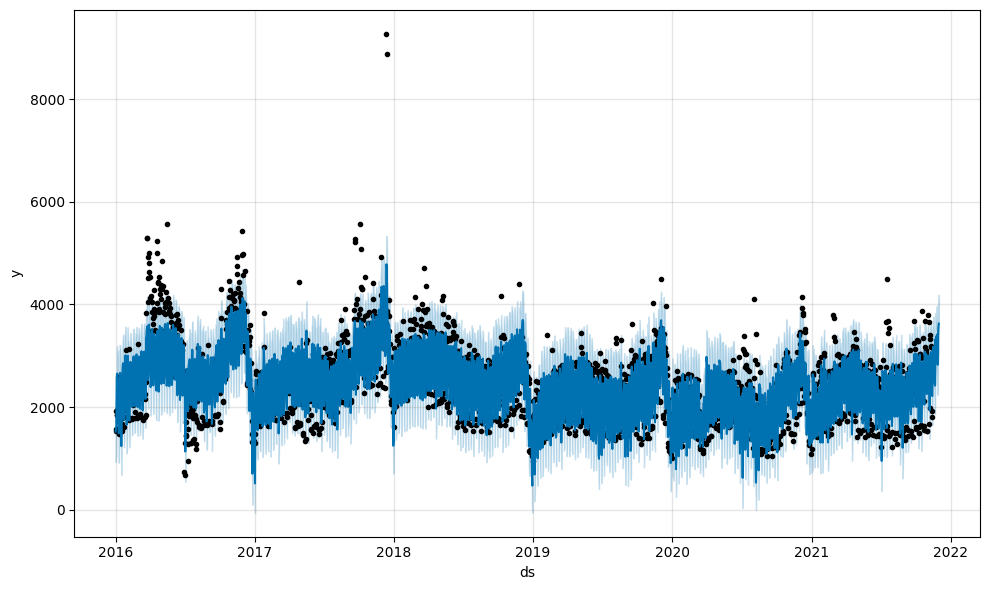

In [ ]:
# Create the time range for the forecast
future_holiday = model_holiday.make_future_dataframe(periods=16)
# Append the regressor values
future_holiday = pd.merge(future_holiday, data[['ds', 'avg_session_duration']], on='ds', how='inner')
future_holiday = pd.merge(future_holiday, data[['ds', 'week_no']], on='ds', how='inner')
future_holiday = pd.merge(future_holiday, data[['ds', 'is_weekend']], on='ds', how='inner')
# Fill the missing values with the previous value
future_holiday = future_holiday.fillna(method='ffill')
# Make prediction
forecast_holiday = model_holiday.predict(future_holiday)
# Visualize the forecast
model_holiday.plot(forecast_holiday); # Add semi-colon to remove the duplicated chart

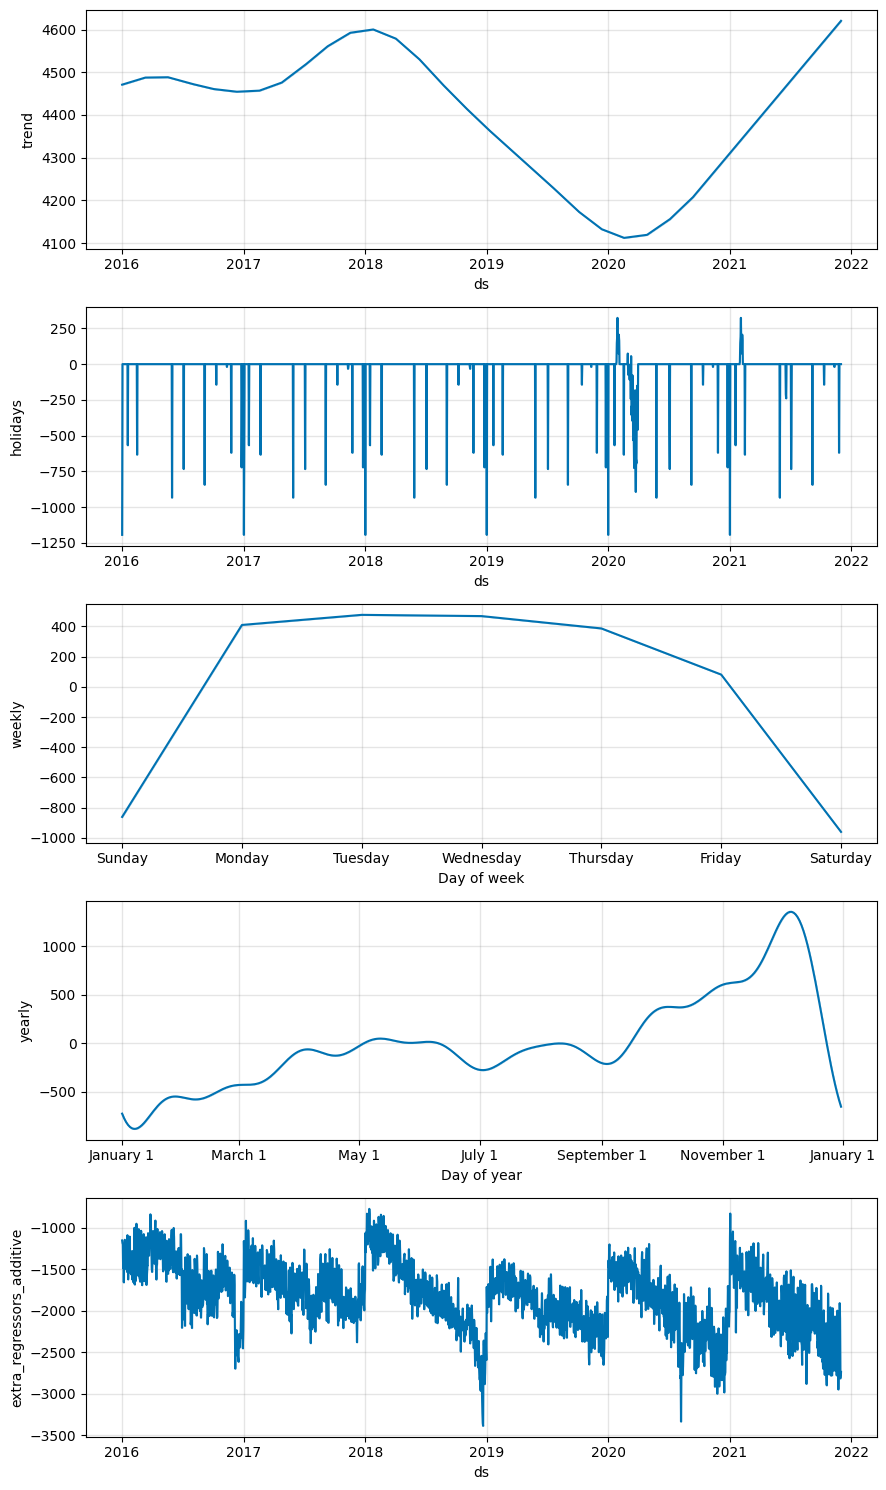

In [ ]:
# Visualize the forecast components
model_holiday.plot_components(forecast_holiday);

In [ ]:
# Merge actual and predicted values
performance_holiday = pd.merge(test, forecast_holiday[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-16:], on='ds')
# Check MAE value
performance_holiday_MAE = mean_absolute_error(performance_holiday['y'], performance_holiday['yhat'])
print(f'The MAE for the holiday/event model is {performance_holiday_MAE}')
# Check MAPE value
performance_holiday_MAPE = mean_absolute_percentage_error(performance_holiday['y'], performance_holiday['yhat'])
print(f'The MAPE for the holiday/event model is {performance_holiday_MAPE}')

The MAE for the holiday/event model is 380.6464598237636
The MAPE for the holiday/event model is 0.15816419939319093


In [ ]:
# Change variable names
data = data.reset_index()
data.columns = ['ds', 'y', 'avg_session_duration', 'week_no', 'is_weekend']
# Check correlation
data.corrwith(data["y"])

<ipython-input-48-a137c42202b9>:5: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corrwith(data["y"])


y                       1.000000
avg_session_duration   -0.050475
week_no                 0.147667
is_weekend             -0.552220
dtype: float64

# main

In [ ]:
# df_train = df[df['ds'] < '2021-11-15']
# df_test = df[df['ds'] >= '2021-11-15']

In [ ]:
# # Change variable names
# data = data.reset_index()
# data.columns = ['ds', 'y', 'avg_session_duration', 'week_no', 'is_weekend']
# # Check correlation
# data.corrwith(data["y"])

<ipython-input-5-a137c42202b9>:5: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corrwith(data["y"])


y                       1.000000
avg_session_duration   -0.050475
week_no                 0.147667
is_weekend             -0.552220
dtype: float64

**e-commerce holiday**

In [5]:
from prophet.make_holidays import make_holidays_df

In [6]:
data = data.reset_index()
year_list = data['date'].dt.year.unique().tolist()
year_list

[2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

In [7]:
holidays = make_holidays_df(year_list=year_list, country='US')

In [8]:
black_friday = pd.DataFrame({'holiday': 'Black Friday',
                             'ds': pd.to_datetime(['2016-11-25',
                                                   '2017-11-24',
                                                   '2018-11-23',
                                                   '2019-11-29',
                                                   '2020-11-27',
                                                   '2021-11-26',
                                                   '2022-11-25',
                                                   '2023-11-24'])})
christmas_eve = pd.DataFrame({'holiday': 'Christmas Eve',
                              'ds': pd.to_datetime(['2016-12-24',
                                                    '2017-12-24',
                                                    '2018-12-24',
                                                    '2019-12-24',
                                                    '2020-12-24',
                                                    '2021-12-24',
                                                    '2022-12-24',
                                                    '2023-12-24',])})
patrick = pd.DataFrame({'holiday': "St. Patrick's Day",
                              'ds': pd.to_datetime(['2016-03-17',
                                                    '2017-03-17',
                                                    '2018-03-17',
                                                    '2019-03-17',
                                                    '2020-03-17',
                                                    '2021-03-17',
                                                    '2022-03-17',
                                                    '2023-03-17',])})
easter = pd.DataFrame({'holiday': 'Easter',
                              'ds': pd.to_datetime(['2016-03-27',
                                                    '2017-04-16',
                                                    '2018-04-01',
                                                    '2019-04-21',
                                                    '2020-04-12',
                                                    '2021-04-04',
                                                    '2022-04-17',
                                                    '2023-04-09',])})
halloween = pd.DataFrame({'holiday': 'Halloween',
                              'ds': pd.to_datetime(['2016-10-31',
                                                    '2017-10-31',
                                                    '2018-10-31',
                                                    '2019-10-31',
                                                    '2020-10-31',
                                                    '2021-10-31',
                                                    '2022-10-31',
                                                    '2023-10-31',])})
single_day = pd.DataFrame({'holiday': 'Single Day',
                              'ds': pd.to_datetime(['2016-11-11',
                                                    '2017-11-11',
                                                    '2018-11-11',
                                                    '2019-11-11',
                                                    '2020-11-11',
                                                    '2021-11-11',
                                                    '2022-11-11',
                                                    '2023-11-11',])})
new_year_eve = pd.DataFrame({'holiday': 'New year eve',
                              'ds': pd.to_datetime(['2016-12-31',
                                                    '2017-12-31',
                                                    '2018-12-31',
                                                    '2019-12-31',
                                                    '2020-12-31',
                                                    '2021-12-31',
                                                    '2022-12-31',
                                                    '2023-12-31',])})
cyber_monday = pd.DataFrame({'holiday': 'Cyber Monday',
                              'ds': pd.to_datetime(['2016-11-28',
                                                    '2017-11-27',
                                                    '2018-11-26',
                                                    '2019-12-02',
                                                    '2020-11-30',
                                                    '2021-11-29',
                                                    '2022-11-28',
                                                    '2023-11-27',])})
super_saturday = pd.DataFrame({'holiday': 'Super Saturday',
                              'ds': pd.to_datetime(['2016-12-24',
                                                    '2017-12-23',
                                                    '2018-12-22',
                                                    '2019-12-21',
                                                    '2020-12-19',
                                                    '2021-12-18',
                                                    '2022-12-24',
                                                    '2023-12-23',])})

In [9]:
holidays = pd.concat([holidays, black_friday, christmas_eve, patrick, easter, halloween, single_day, new_year_eve, cyber_monday, super_saturday]
                    ).sort_values('ds').reset_index(drop=True)

In [10]:
holidays

,ds,holiday
0,2016-01-01,New Year's Day
1,2016-01-18,Martin Luther King Jr. Day
2,2016-02-15,Washington's Birthday
3,2016-03-17,St. Patrick's Day
4,2016-03-27,Easter
...,...,...
163,2023-11-27,Cyber Monday
164,2023-12-23,Super Saturday
165,2023-12-24,Christmas Eve
166,2023-12-25,Christmas Day


main model

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from pandas.tseries.holiday import USFederalHolidayCalendar

# # Load the dataset
# data = pd.read_csv('your_data.csv')

# data = data.reset_index()

# Prepare the dataset for Prophet
df = data[['date', 'sessions', 'avg_session_duration', 'week_no', 'is_weekend']]
df.columns = ['ds', 'y', 'avg_session_duration', 'week_no', 'is_weekend']
df['ds'] = pd.to_datetime(df['ds'])

# Create and fit the Prophet model
model = Prophet(seasonality_mode='multiplicative', holidays=holidays)
model.add_regressor('avg_session_duration')
model.add_regressor('week_no')
model.add_regressor('is_weekend')

# # Add US holidays to the model
# cal = USFederalHolidayCalendar()
# holidays = cal.holidays(start=df['ds'].min(), end=df['ds'].max())
# holiday_df = pd.DataFrame({'holiday': 'us_holidays', 'ds': holidays})
model.add_country_holidays(country_name='US')

# Fit the model
model.fit(df)

# Create a future dataframe for forecasting
future = model.make_future_dataframe(periods=14)  # Forecasting next 14 days





# # Set the regressor values for the future dataframe
# future['avg_session_duration'] = df['avg_session_duration']
# future['week_no'] = df['week_no']
# future['is_weekend'] = df['is_weekend']

# # Make the predictions
# forecast = model.predict(future)

# # Get the forecast for the next 14 days
# forecast_14_days = forecast.tail(14)

# # Print the forecasted sessions for the next 14 days
# print(forecast_14_days[['ds', 'yhat']].tail(14))


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwwbbyu2y/2aa0nmf0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwwbbyu2y/xzrxdoy5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10631', 'data', 'file=/tmp/tmpwwbbyu2y/2aa0nmf0.json', 'init=/tmp/tmpwwbbyu2y/xzrxdoy5.json', 'output', 'file=/tmp/tmpwwbbyu2y/prophet_modelr2zvt81l/prophet_model-20230715045022.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:50:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:50:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [12]:
future.tail()

,ds
2692,2023-05-16
2693,2023-05-17
2694,2023-05-18
2695,2023-05-19
2696,2023-05-20


In [13]:
df = df.reset_index()

In [14]:
df.tail()

,index,ds,y,avg_session_duration,week_no,is_weekend
2678,2678,2023-05-02,3202,185.98,18,0
2679,2679,2023-05-03,2808,176.39,18,0
2680,2680,2023-05-04,2842,194.42,18,0
2681,2681,2023-05-05,2598,160.21,18,0
2682,2682,2023-05-06,1981,134.34,18,1


### Add 'avg_duration', 'is_week_no' and 'is_weekend'  values for future dates

In [15]:
# Add 'avg_duration', 'is_week_no' and 'is_weekend'  values for future dates

# Merge or join the 'avg_session_duration' DataFrame with the original DataFrame on the 'date' column
df2 = future.merge(df[['ds', 'y', 'avg_session_duration']], left_on='ds', right_on='ds', how='left')
# df2 = df2['ds', avg_session_duration_y]
# df2 = df2.drop('date', axis='columns')

# Add 'is_weekend' column based on day of the week (0 = Monday, 6 = Sunday)
df2['is_weekend'] = df2['ds'].dt.dayofweek.isin([5, 6]).astype(int)

# Add 'week_no' column based on week number
df2['week_no'] = df2['ds'].dt.week

df2.tail(20)

<ipython-input-15-80cc9e0a7771>:12: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df2['week_no'] = df2['ds'].dt.week


,ds,y,avg_session_duration,is_weekend,week_no
2677,2023-05-01,2468.0,178.48,0,18
2678,2023-05-02,3202.0,185.98,0,18
2679,2023-05-03,2808.0,176.39,0,18
2680,2023-05-04,2842.0,194.42,0,18
2681,2023-05-05,2598.0,160.21,0,18
2682,2023-05-06,1981.0,134.34,1,18
2683,2023-05-07,NaN,NaN,1,18
2684,2023-05-08,NaN,NaN,0,19
2685,2023-05-09,NaN,NaN,0,19
2686,2023-05-10,NaN,NaN,0,19


In [ ]:
# # Add 'is_weekend' column based on day of the week (0 = Monday, 6 = Sunday)
# df2['is_weekend'] = df2['ds'].dt.dayofweek.isin([5, 6]).astype(int)

# # Add 'week_no' column based on week number
# df2['week_no'] = df2['ds'].dt.week

# df2.tail(20)

Fill null with mean

In [16]:
mean_duration = df2['avg_session_duration'].mean()
mean_duration

170.27206485277674

In [17]:
df2.loc[(df2['ds'] >= '2023-05-07') & (df2['ds'] <= '2023-05-20'), 'avg_session_duration'] = mean_duration

In [18]:
df2.tail(20)

,ds,y,avg_session_duration,is_weekend,week_no
2677,2023-05-01,2468.0,178.480000,0,18
2678,2023-05-02,3202.0,185.980000,0,18
2679,2023-05-03,2808.0,176.390000,0,18
2680,2023-05-04,2842.0,194.420000,0,18
2681,2023-05-05,2598.0,160.210000,0,18
2682,2023-05-06,1981.0,134.340000,1,18
2683,2023-05-07,NaN,170.272065,1,18
2684,2023-05-08,NaN,170.272065,0,19
2685,2023-05-09,NaN,170.272065,0,19
2686,2023-05-10,NaN,170.272065,0,19


In [19]:
# Set the regressor values for the future dataframe
future['avg_session_duration'] = df2['avg_session_duration']
future['week_no'] = df2['week_no']
future['is_weekend'] = df2['is_weekend']

# Make the predictions
forecast = model.predict(future)

# Get the forecast for the next 14 days
forecast_14_days = forecast.tail(14)

# Print the forecasted sessions for the next 14 days
print(forecast_14_days[['ds', 'yhat']].tail(14))

             ds         yhat
2683 2023-05-07  2157.288511
2684 2023-05-08  3218.784425
2685 2023-05-09  3334.157834
2686 2023-05-10  3331.209260
2687 2023-05-11  3238.225519
2688 2023-05-12  2890.155165
2689 2023-05-13  2041.105600
2690 2023-05-14  2139.438604
2691 2023-05-15  3188.219417
2692 2023-05-16  3292.888774
2693 2023-05-17  3280.676759
2694 2023-05-18  3180.088680
2695 2023-05-19  2826.438551
2696 2023-05-20  1974.222634


In [ ]:
# corr = df2.corr()
# corr.style.background_gradient(cmap='viridis')

In [ ]:
# corr1 = forecast.corr()
# corr1.style.background_gradient(cmap='viridis')

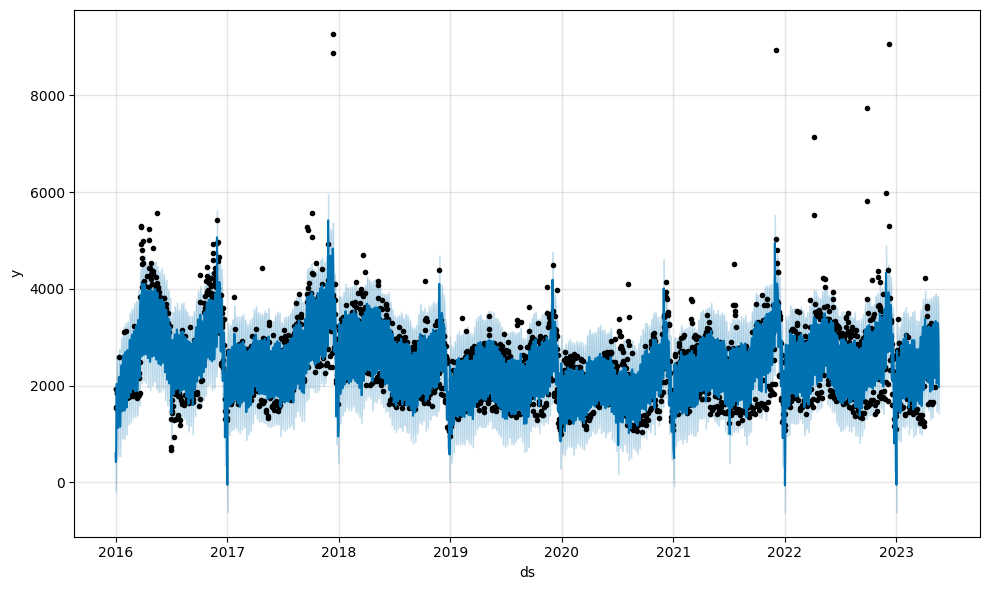

In [20]:
model.plot(forecast);

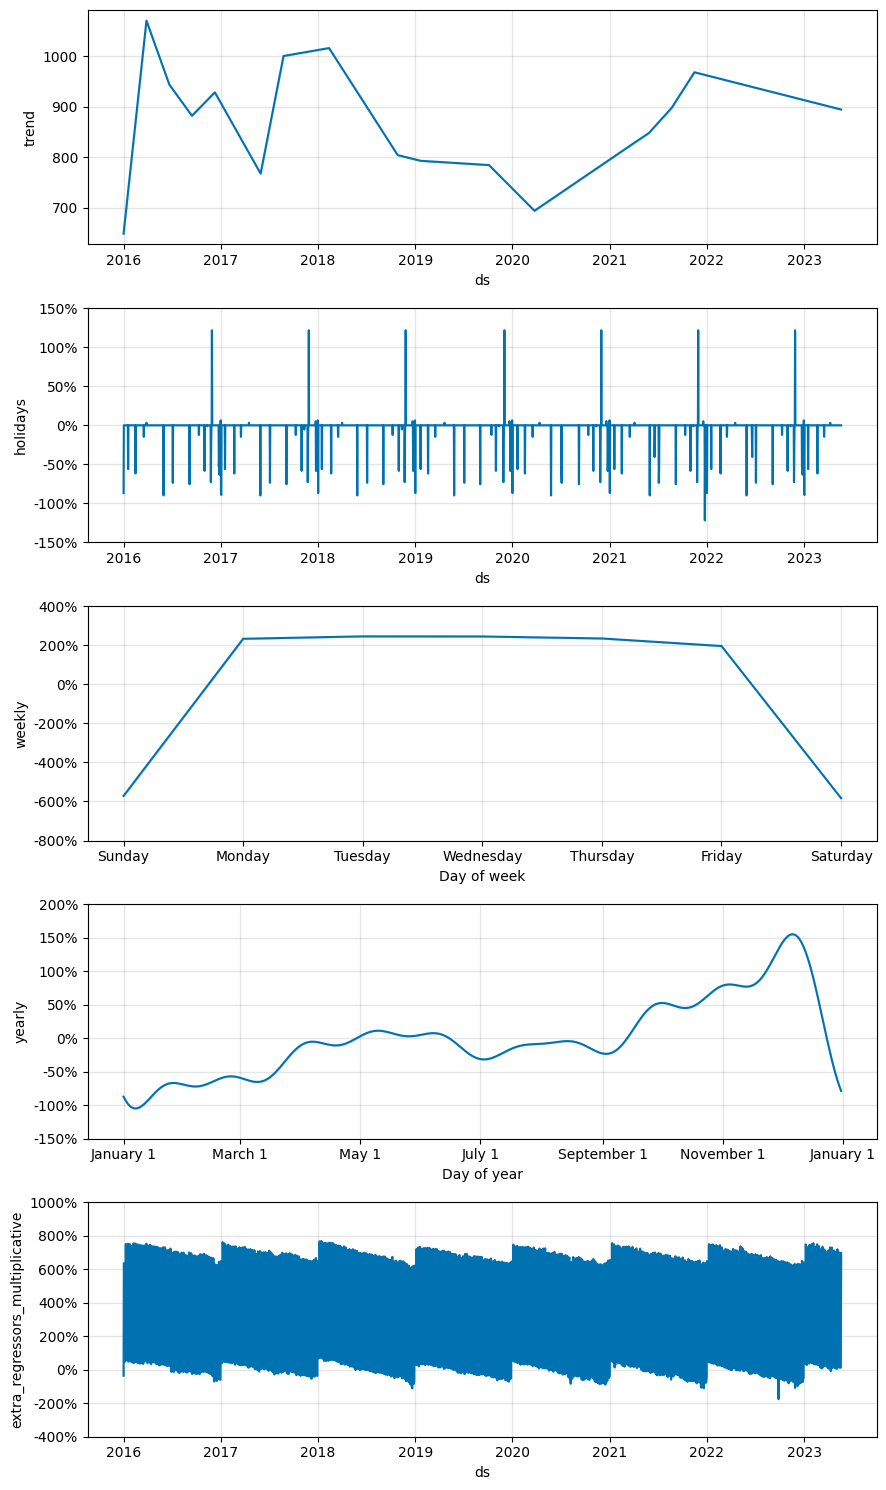

In [21]:
model.plot_components(forecast);

**variable for noti**

In [22]:
from prophet.diagnostics import performance_metrics
from prophet.diagnostics import cross_validation
from prophet.plot import plot_cross_validation_metric

In [23]:
df_cv = cross_validation(model, initial='1825 days', period='120 days', horizon = '14 days', parallel= 'processes')

INFO:prophet:Making 8 forecasts with cutoffs between 2021-01-02 00:00:00 and 2023-04-22 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7ec98257fa60>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwwbbyu2y/nt3t7wa8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwwbbyu2y/vmthsk42.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwwbbyu2y/oyuolsx5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14797', 'data', 'file=/tmp/tmpwwbbyu2y/nt3t7wa8.json', 'init=/tmp/tmpwwbbyu2y/oyuolsx5.json', 'output', 'file=/tmp/tmpwwbbyu2y/prophet_modeloyl3j7k7/prophet_model-20230715045126.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:51:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwwbbyu2y/_t34w_ho.json
DEB

In [24]:
df_p = performance_metrics(df_cv)
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,2 days,177575.373015,421.396930,331.614641,0.179815,0.184164,0.175234,0.750000
1,3 days,138330.234145,371.927727,295.820247,0.171662,0.147838,0.176805,0.750000
2,4 days,84300.771376,290.345951,235.362830,0.128461,0.093145,0.127684,0.840909
3,5 days,106406.969193,326.200811,291.791743,0.146669,0.147214,0.134714,0.965909
4,6 days,201481.278558,448.866660,365.930846,0.190623,0.186312,0.164962,0.818182
5,7 days,130132.566434,360.738917,300.144783,0.164243,0.092206,0.145738,0.840909
6,8 days,76864.380508,277.244261,245.521039,0.134174,0.093148,0.129815,0.965909
7,9 days,157049.674947,396.294934,314.753279,0.141699,0.068195,0.140377,0.727273
8,10 days,126552.353793,355.741976,279.774877,0.129827,0.065537,0.122930,0.806818
9,11 days,91940.530081,303.216969,233.535766,0.101412,0.066042,0.094125,0.965909


In [25]:
mean_mae = df_p['mae'].mean()
mean_mae

275.6860948334378

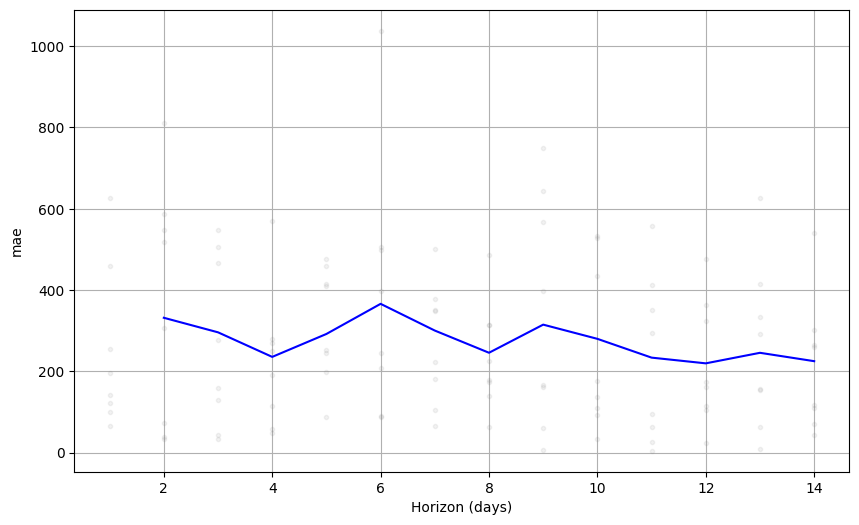

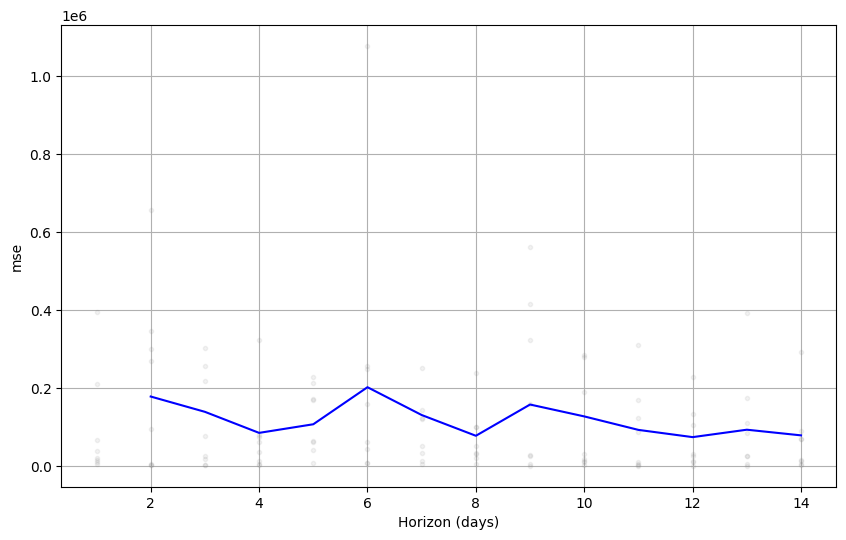

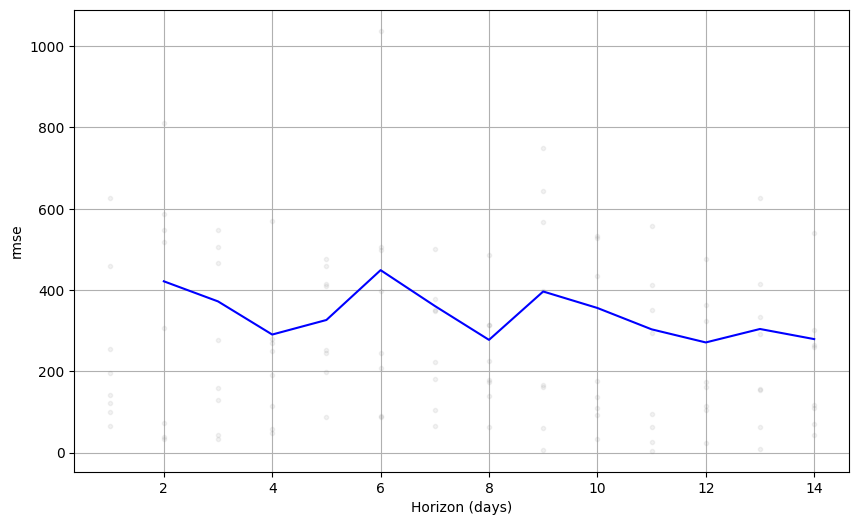

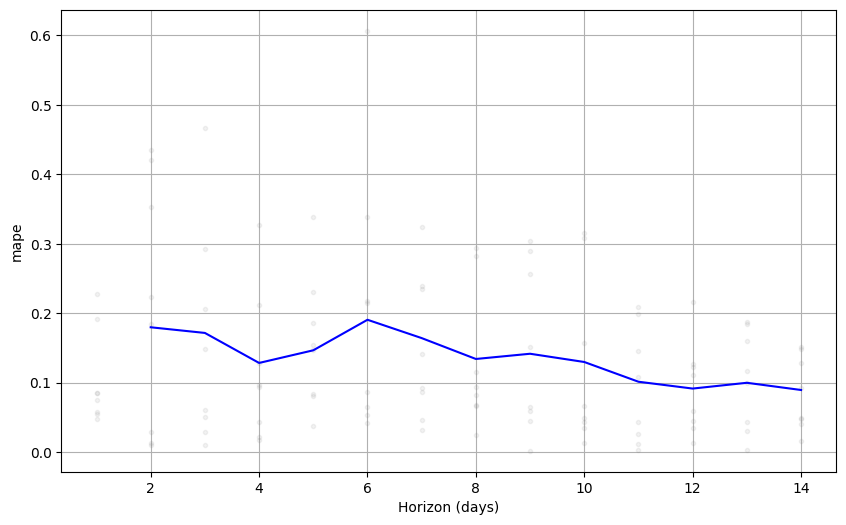

In [26]:
plot_cross_validation_metric(df_cv, metric='mae');
plot_cross_validation_metric(df_cv, metric='mse');
plot_cross_validation_metric(df_cv, metric='rmse');
plot_cross_validation_metric(df_cv, metric='mape');

In [27]:
model.train_holiday_names

0                                      New Year's Day
1                          Martin Luther King Jr. Day
2                               Washington's Birthday
3                                   St. Patrick's Day
4                                              Easter
5                                        Memorial Day
6                                    Independence Day
7                                           Labor Day
8                                        Columbus Day
9                                           Halloween
10                                       Veterans Day
11                                         Single Day
12                                       Thanksgiving
13                                       Black Friday
14                                       Cyber Monday
15                                      Christmas Eve
16                                     Super Saturday
17                                      Christmas Day
18                          

In [ ]:
# def first_non_zero(fcst, holiday):
#     return fcst[fcst[holiday] != 0][holiday].values[0]

# pd.DataFrame({'holiday': model.train_holiday_names,
#               'effect': [first_non_zero(forecast, holiday)
#                          for holiday in model.train_holiday_names]})

,holiday,effect
0,New Year's Day,-0.867973
1,Martin Luther King Jr. Day,-0.561063
2,Washington's Birthday,-0.616527
3,St. Patrick's Day,-0.147979
4,Easter,0.032213
5,Memorial Day,-0.897875
6,Independence Day,-0.736823
7,Labor Day,-0.754722
8,Columbus Day,-0.124053
9,Halloween,-0.583431


In [28]:
import numpy as np
from scipy import stats

# Generate a random dataset (replace with your actual data)
dataset = data['sessions']

# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = np.percentile(dataset, 25)
Q3 = np.percentile(dataset, 75)

# Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1

# Set a threshold for outlier detection (e.g., 1.5 times IQR or higher)
threshold = 1.5

# Determine the lower and upper bounds for outliers
lower_bound = Q1 - (threshold * IQR)
upper_bound = Q3 + (threshold * IQR)

# # Find the indices of outliers
# outlier_indices = np.where((dataset < lower_bound) | (dataset > upper_bound))[0]

# # Get the corresponding outlier values
# outlier_values = dataset[outlier_indices]

# # Print the outlier indices and values
# print("Outlier indices:", outlier_indices)
# print("Outlier values:", outlier_values)

print("lower_bound:", lower_bound)
print("upper_bound:", upper_bound)

lower_bound: 283.75
upper_bound: 4625.75


### Line notify

In [29]:
# Assuming 'result' is the DataFrame containing the result
last_yhat_value = forecast_14_days.iloc[-1]['yhat']
last_yhat_value

1974.2226336096744

In [30]:
last_ds_value = forecast_14_days.iloc[-1]['ds'].date()
last_ds_value

datetime.date(2023, 5, 20)

In [31]:
token = 'fTw8FaYRhLog5JMhFz996R68zbwCfsR1C7TPCWpmOP9'

In [32]:
import requests

In [33]:
url = 'https://notify-api.line.me/api/notify'

In [34]:
headers = {'content-type':'application/x-www-form-urlencoded', 'Authorization':'Bearer ' + token}

In [35]:
session = requests.Session()

In [ ]:
# text = {'message': f'''Local server on {last_ds_value} tends to be insufficient due to the predicted peak load reaching {last_yhat_value:.2f} 🔥🔥🔥. Please be prepared'''
#             , 'stickerPackageId': 11537, 'stickerId': 52002751}

In [ ]:
# session.post(url, headers=headers, data=text)

<Response [200]>

In [36]:
limit = upper_bound
# limit = 1800  # Set the limit value

if last_yhat_value > limit:
    chat = {
        'message': f'''Local server on {last_ds_value} tends to be insufficient due to the predicted peak load reaching {last_yhat_value:.2f} 🔥🔥🔥. Please be prepared''',
        'stickerPackageId': 1070,
        'stickerId': 17875
    }
    session.post(url, headers=headers, data=chat)
# else:
#     chat = {
#         'message': '',
#         'stickerPackageId': 8525,
#         'stickerId': 16581303
#     }
#     session.post(url, headers=headers, data=chat)

# hide 2

In [ ]:
###### Step 1: Install and Import Libraries
# Install libraries
!pip install yfinance prophet
# Get time series data
import yfinance as yf
# Prophet model for time series forecast
from prophet import Prophet
# Data processing
import numpy as np
import pandas as pd
# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
# Model performance evaluation
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
###### Step 2: Pull Data
# Data start date
start_date = '2020-01-02'
# Data end date. yfinance excludes the end date, so we need to add one day to the last day of data
end_date = '2022-01-01'
# Date for splitting training and testing dataset
train_end_date = '2021-12-15'
# Pull close data from Yahoo Finance for the list of tickers
ticker_list = ['GOOG', 'VTI']
data = yf.download(ticker_list, start=start_date, end=end_date)[['Close']]
# Take a look at the data
data.head()
# Drop one level of the column names
data.columns = data.columns.droplevel(0)
# Take a look at the data
data.head()
# Information on the dataframe
data.info()
# Visualize data using seaborn
sns.set(rc={'figure.figsize':(12,8)})
sns.lineplot(x=data.index, y=data['GOOG'])
sns.lineplot(x=data.index, y=data['VTI'])
plt.legend(['Google', 'VTI'])
###### Step 3: Data Processing
# Change variable names
data = data.reset_index()
data.columns = ['ds', 'y', 'VTI']
# Take a look at the data
data.head()
# Check correlation
data.corrwith(data["y"])
###### Step 4: Train Test Split
# Train test split
train = data[data['ds'] <= train_end_date]
test = data[data['ds'] > train_end_date]
# Check the shape of the dataset
print(train.shape)
print(test.shape)
# Check the start and end time of the training and testing dataset
print('The start time of the training dataset is ', train['ds'].min())
print('The end time of the training dataset is ', train['ds'].max())
print('The start time of the testing dataset is ', test['ds'].min())
print('The end time of the testing dataset is ', test['ds'].max())
###### Step 5: Baseline Model
# Use the default hyperparameters to initiate the Prophet model
model_baseline = Prophet()
# Fit the model on the training dataset
model_baseline.fit(train)
# Create the time range for the forecast
future_baseline = model_baseline.make_future_dataframe(periods=16)
# Make prediction
forecast_baseline = model_baseline.predict(future_baseline)
# Visualize the forecast
model_baseline.plot(forecast_baseline); # Add semi-colon to remove the duplicated chart
# Visualize the forecast components
model_baseline.plot_components(forecast_baseline);
# Merge actual and predicted values
performance_baseline = pd.merge(test, forecast_baseline[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-16:], on='ds')
# Check MAE value
performance_baseline_MAE = mean_absolute_error(performance_baseline['y'], performance_baseline['yhat'])
print(f'The MAE for the baseline model is {performance_baseline_MAE}')
# Check MAPE value
performance_baseline_MAPE = mean_absolute_percentage_error(performance_baseline['y'], performance_baseline['yhat'])
print(f'The MAPE for the baseline model is {performance_baseline_MAPE}')
###### Step 6: Add Seasonality to Baseline Model
# Add seasonality
model_season = Prophet(yearly_seasonality=True, weekly_seasonality=True)
# Fit the model on the training dataset
model_season.fit(train)
# Create the time range for the forecast
future_season = model_season.make_future_dataframe(periods=16)
# Make prediction
forecast_season = model_season.predict(future_season)
# Visualize the forecast
model_season.plot(forecast_season); # Add semi-colon to remove the duplicated chart
# Visualize the forecast components
model_season.plot_components(forecast_season);
# Merge actual and predicted values
performance_season = pd.merge(test, forecast_season[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-16:], on='ds')
# Check MAE value
performance_season_MAE = mean_absolute_error(performance_season['y'], performance_season['yhat'])
print(f'The MAE for the seasonality model is {performance_season_MAE}')
# Check MAPE value
performance_season_MAPE = mean_absolute_percentage_error(performance_season['y'], performance_season['yhat'])
print(f'The MAPE for the seasonality model is {performance_season_MAPE}')
###### Step 7: Multivariate Model
# Add seasonality
model_multivariate = Prophet(yearly_seasonality=True, weekly_seasonality=True)
# Add regressor
model_multivariate.add_regressor('VTI', standardize=False)
# Fit the model on the training dataset
model_multivariate.fit(train)
# Create the time range for the forecast
future_multivariate = model_multivariate.make_future_dataframe(periods=16)
# Append the regressor values
future_multivariate = pd.merge(future_multivariate, data[['ds', 'VTI']], on='ds', how='inner')
# Fill the missing values with the previous value
future_multivariate = future_multivariate.fillna(method='ffill')
# Check the data
future_multivariate.tail(10)
# Make prediction
forecast_multivariate = model_multivariate.predict(future_multivariate)
# Visualize the forecast
model_multivariate.plot(forecast_multivariate); # Add semi-colon to remove the duplicated chart
# Visualize the forecast components
model_multivariate.plot_components(forecast_multivariate);
# Merge actual and predicted values
performance_multivariate = pd.merge(test, forecast_multivariate[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-16:], on='ds')
# Check MAE value
performance_multivariate_MAE = mean_absolute_error(performance_multivariate['y'], performance_multivariate['yhat'])
print(f'The MAE for the multivariate model is {performance_multivariate_MAE}')
# Check MAPE value
performance_multivariate_MAPE = mean_absolute_percentage_error(performance_multivariate['y'], performance_multivariate['yhat'])
print(f'The MAPE for the multivariate model is {performance_multivariate_MAPE}')
###### Step 8: Model with Holiday Effect and Event Effect
# COVID time window
COVID = pd.DataFrame({
    'holiday': 'COVID',
    'ds': pd.to_datetime(['2020-03-15']),
    'lower_window': -15,
    'upper_window': 15,
})
# Super Bowl time window
superbowl = pd.DataFrame({
    'holiday': 'superbowl',
    'ds': pd.to_datetime(['2020-02-02', '2021-02-07']),
    'lower_window': -7,
    'upper_window': 1,
})
# Combine all events
events = pd.concat((COVID, superbowl))
# Take a look at the events data
events
# Add holidays
model_holiday = Prophet(yearly_seasonality=True, weekly_seasonality=True, holidays=events)
# Add built-in country-specific holidays
model_holiday.add_country_holidays(country_name='US')
# Add regressor
model_holiday.add_regressor('VTI', standardize=False)
# Fit the model on the training dataset
model_holiday.fit(train)
# All the holidays and events
model_holiday.train_holiday_names
# Create the time range for the forecast
future_holiday = model_holiday.make_future_dataframe(periods=16)
# Append the regressor values
future_holiday = pd.merge(future_holiday, data[['ds', 'VTI']], on='ds', how='inner')
# Fill the missing values with the previous value
future_holiday = future_holiday.fillna(method='ffill')
# Make prediction
forecast_holiday = model_holiday.predict(future_holiday)
# Visualize the forecast
model_holiday.plot(forecast_holiday); # Add semi-colon to remove the duplicated chart
# Visualize the forecast components
model_holiday.plot_components(forecast_holiday);
# Merge actual and predicted values
performance_holiday = pd.merge(test, forecast_holiday[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-16:], on='ds')
# Check MAE value
performance_holiday_MAE = mean_absolute_error(performance_holiday['y'], performance_holiday['yhat'])
print(f'The MAE for the holiday/event model is {performance_holiday_MAE}')
# Check MAPE value
performance_holiday_MAPE = mean_absolute_percentage_error(performance_holiday['y'], performance_holiday['yhat'])
print(f'The MAPE for the holiday/event model is {performance_holiday_MAPE}')